<a href="https://colab.research.google.com/github/wenjunsun/Covid-19-analysis-with-uw-ubicomp/blob/master/week11/validate_safegraph_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will try to validate our SafeGraph data and compare it to Google Mobility dataset.

# 0. go to data directory

In [47]:
cd drive/My\ Drive/covid/PSM/data

/content/drive/My Drive/covid/PSM/data


In [54]:
ls

agg_social_dist_2.csv  google_mobility.csv
agg_social_dist.csv    social_dist_aggregated_on_county.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. look at Google mobility data

In [ ]:
google_data = pd.read_csv('google_mobility.csv', infer_datetime_format=True, parse_dates = ['date'])

In [ ]:
google_data.shape

(668461, 14)

In [ ]:
google_data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668456,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-11-02,NaN,NaN,NaN,NaN,-22.0,NaN
668457,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-11-03,NaN,NaN,NaN,NaN,-14.0,NaN
668458,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-11-04,NaN,NaN,NaN,NaN,-22.0,NaN
668459,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-11-05,NaN,NaN,NaN,NaN,-18.0,NaN


In [ ]:
king_county_data = google_data[google_data['census_fips_code'] == 53033]

In [ ]:
king_county_data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
629874,US,United States,Washington,King County,NaN,NaN,53033.0,2020-02-15,-1.0,-2.0,11.0,8.0,-3.0,0.0
629875,US,United States,Washington,King County,NaN,NaN,53033.0,2020-02-16,13.0,1.0,19.0,3.0,-2.0,-1.0
629876,US,United States,Washington,King County,NaN,NaN,53033.0,2020-02-17,10.0,4.0,64.0,-13.0,-40.0,7.0
629877,US,United States,Washington,King County,NaN,NaN,53033.0,2020-02-18,4.0,2.0,51.0,6.0,-8.0,1.0
629878,US,United States,Washington,King County,NaN,NaN,53033.0,2020-02-19,2.0,2.0,62.0,6.0,-7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630135,US,United States,Washington,King County,NaN,NaN,53033.0,2020-11-02,-28.0,-15.0,12.0,-57.0,-52.0,18.0
630136,US,United States,Washington,King County,NaN,NaN,53033.0,2020-11-03,-31.0,-16.0,-25.0,-60.0,-54.0,21.0
630137,US,United States,Washington,King County,NaN,NaN,53033.0,2020-11-04,-34.0,-20.0,-9.0,-61.0,-54.0,20.0
630138,US,United States,Washington,King County,NaN,NaN,53033.0,2020-11-05,-35.0,-20.0,-26.0,-60.0,-53.0,21.0


Text(0.5, 1.0, "change of people's stay at home behavior compared to baseline in king county")

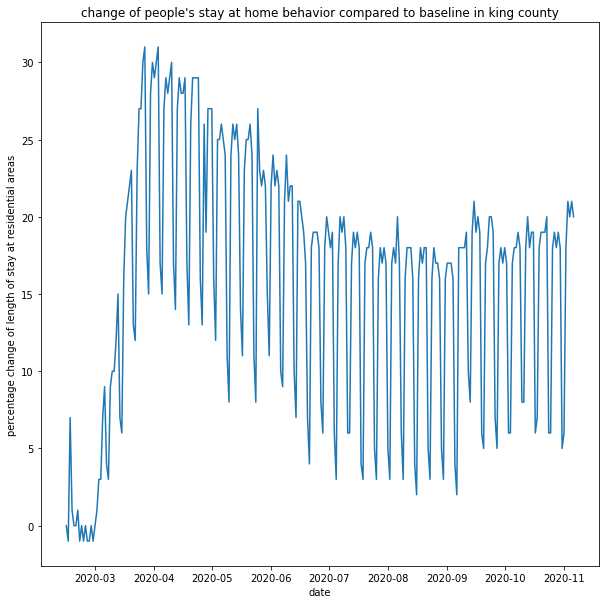

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(king_county_data['date'], king_county_data['residential_percent_change_from_baseline'])
plt.xlabel('date')
plt.ylabel('percentage change of length of stay at residential areas')
plt.title('change of people\'s stay at home behavior compared to baseline in king county')

Note: According to Google, the baseline is the median value, for the corresponding day of the week, during the 5-week period Jan 3–Feb 6, 2020.

In [66]:
# plot the times series of variable, of the county with
# fips_code
def plotTimeSeries(variable, fips_code):
  this_data = google_data[google_data['census_fips_code'] == fips_code]

  if (this_data.shape[0] == 0):
    print(f'there is no county with {fips_code} fips_code')
    return
  
  county_name = this_data.iloc[0]['sub_region_2']
  plt.figure(figsize = (10, 6))
  plt.plot(this_data['date'], this_data[variable])
  plt.xlabel('date')
  plt.ylabel(variable)
  plt.title(f'change of people\'s {variable} compared to baseline in {county_name}')

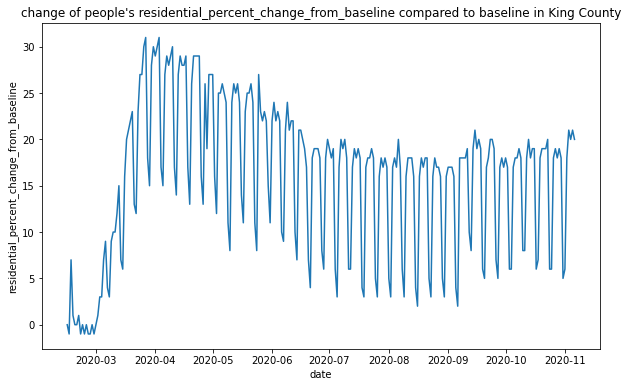

In [67]:
plotTimeSeries(variable = 'residential_percent_change_from_baseline', fips_code = 53033)

In [68]:
variables = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
             'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']

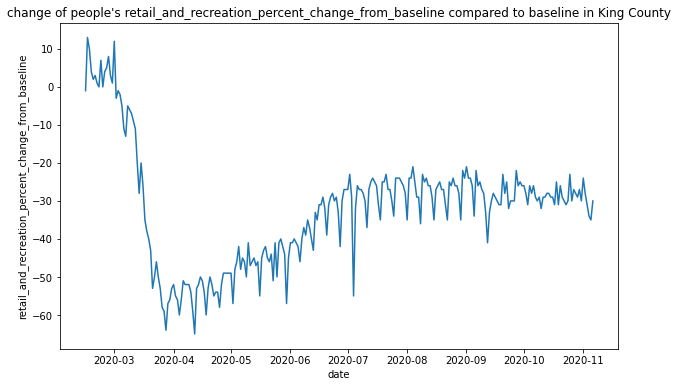

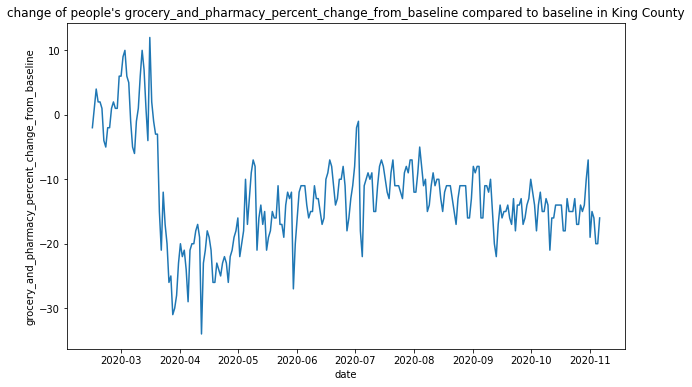

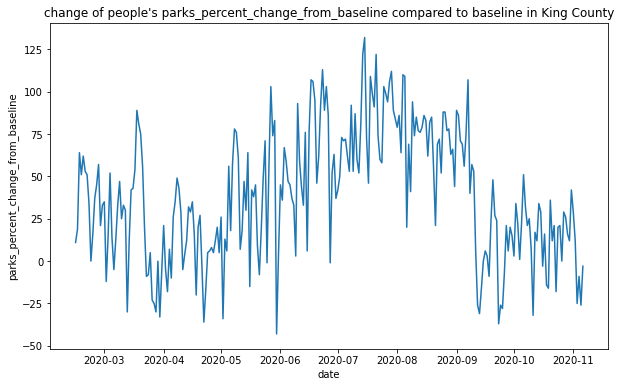

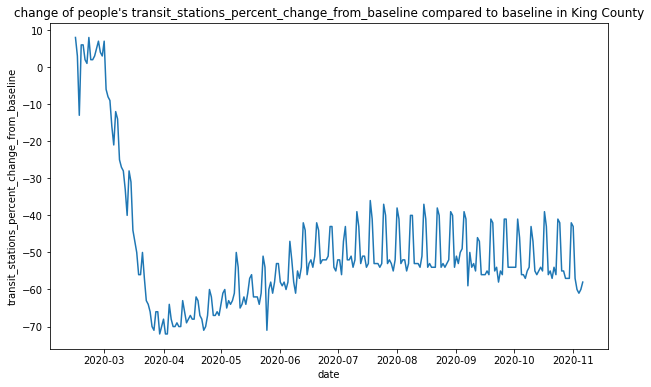

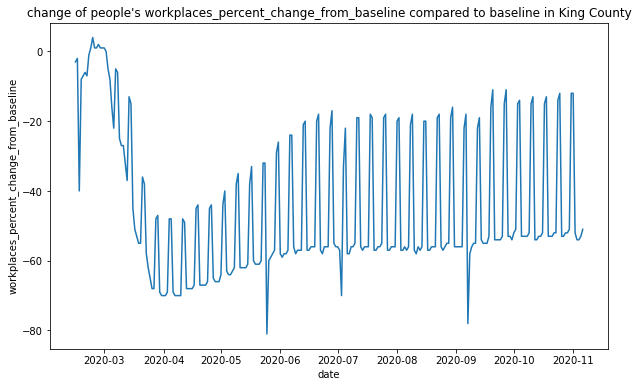

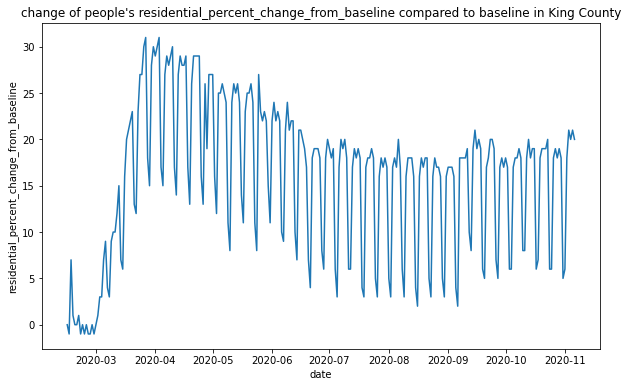

In [69]:
for variable in variables:
  plotTimeSeries(variable = variable, fips_code = 53033)

Now let's plot time series of LA county

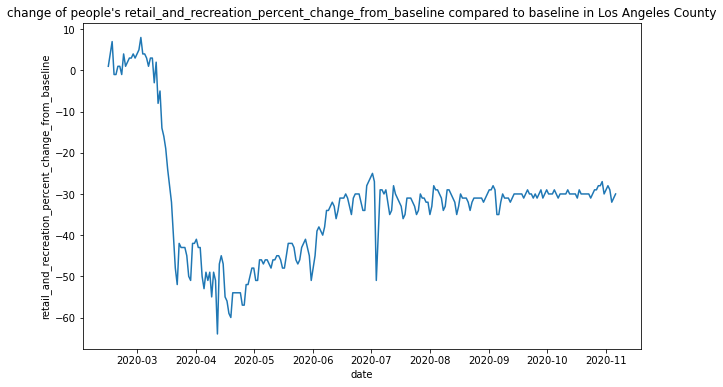

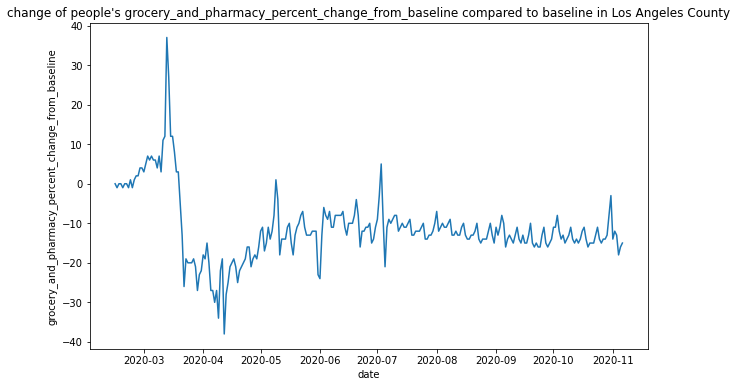

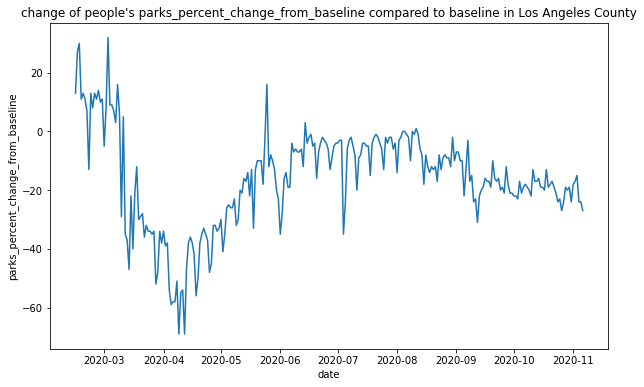

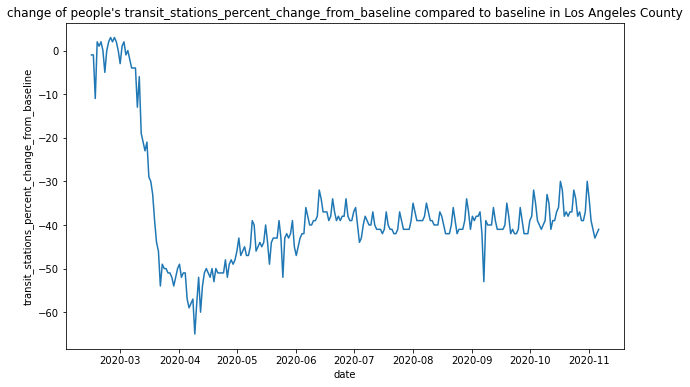

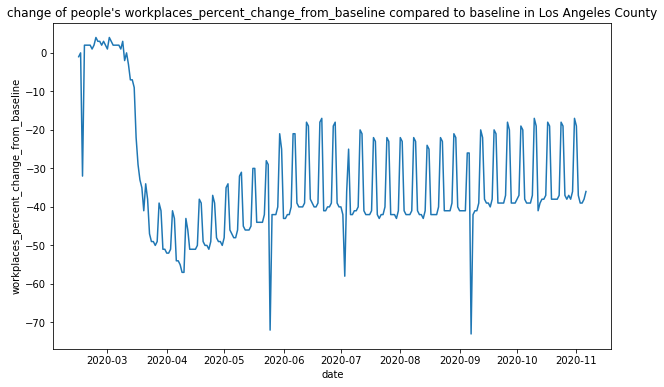

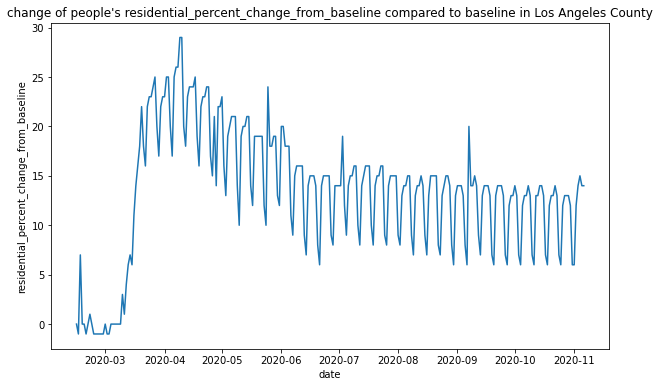

In [70]:
for variable in variables:
  plotTimeSeries(variable = variable, fips_code = 6037)

As we can see, both LA and King county has a pretty dramatic increase of people's stay in residences, going up to 30% increase compared to baseline, and declined somewhat as time goes on. Let's compare this to SafeGraph's mobility data.

# 2. Look at SafeGraph mobility data

In [72]:
safe_graph_data = pd.read_csv('social_dist_aggregated_on_county.csv', parse_dates=['date_range_start'],\
                              infer_datetime_format = True)

In [73]:
safe_graph_data

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count
0,2019-01-01,1.0,AL,Autauga County,1001.0,4708.0,1829.0
1,2019-01-01,1.0,AL,Baldwin County,1003.0,19655.0,7717.0
2,2019-01-01,1.0,AL,Barbour County,1005.0,1570.0,594.0
3,2019-01-01,1.0,AL,Bibb County,1007.0,1702.0,623.0
4,2019-01-01,1.0,AL,Blount County,1009.0,5224.0,1901.0
...,...,...,...,...,...,...,...
1889781,2020-08-08,72.0,PR,Yabucoa Municipio,72151.0,385.0,122.0
1889782,2020-08-08,72.0,PR,Yauco Municipio,72153.0,519.0,198.0
1889783,2020-08-08,78.0,VI,St. Croix Island,78010.0,1083.0,295.0
1889784,2020-08-08,78.0,VI,St. John Island,78020.0,125.0,23.0


In [74]:
safe_graph_data['perc_completely_stay_at_home'] = safe_graph_data['completely_home_device_count'] / safe_graph_data['device_count']

In [75]:
safe_graph_data

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,perc_completely_stay_at_home
0,2019-01-01,1.0,AL,Autauga County,1001.0,4708.0,1829.0,0.388488
1,2019-01-01,1.0,AL,Baldwin County,1003.0,19655.0,7717.0,0.392623
2,2019-01-01,1.0,AL,Barbour County,1005.0,1570.0,594.0,0.378344
3,2019-01-01,1.0,AL,Bibb County,1007.0,1702.0,623.0,0.366040
4,2019-01-01,1.0,AL,Blount County,1009.0,5224.0,1901.0,0.363897
...,...,...,...,...,...,...,...,...
1889781,2020-08-08,72.0,PR,Yabucoa Municipio,72151.0,385.0,122.0,0.316883
1889782,2020-08-08,72.0,PR,Yauco Municipio,72153.0,519.0,198.0,0.381503
1889783,2020-08-08,78.0,VI,St. Croix Island,78010.0,1083.0,295.0,0.272392
1889784,2020-08-08,78.0,VI,St. John Island,78020.0,125.0,23.0,0.184000


In [76]:
# plot time series of a variable of a county with fips_code
# , in the safe_graph_data dataset
def plotTimeSeries_2(variable, fips_code):
  this_data = safe_graph_data[safe_graph_data['county_code'] == fips_code]

  if (this_data.shape[0] == 0):
    print(f'there is no county with {fips_code} fips_code')
    return
  
  county_name = this_data.iloc[0]['cnamelong']
  plt.figure(figsize = (20, 6))
  plt.plot(this_data['date_range_start'], this_data[variable])
  plt.xlabel('date')
  plt.ylabel(variable)
  plt.title(f'change of people\'s {variable} compared to baseline in {county_name}')

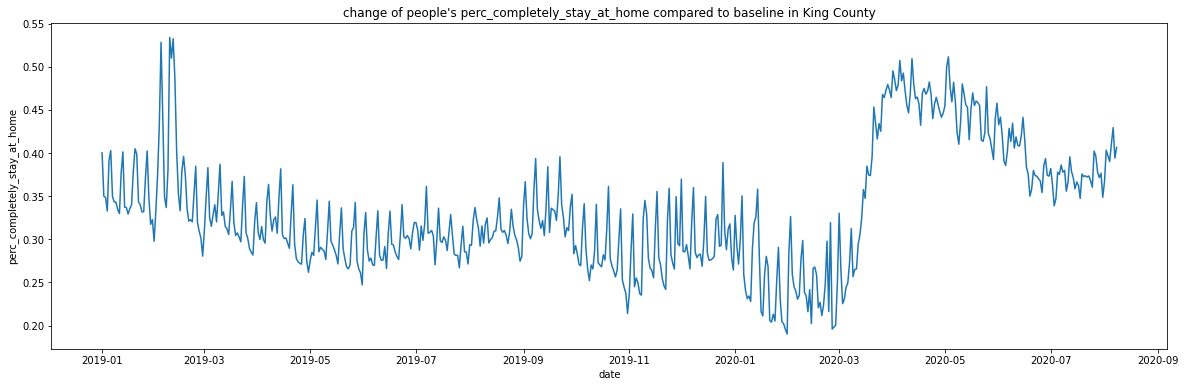

In [77]:
plotTimeSeries_2('perc_completely_stay_at_home', 53033)

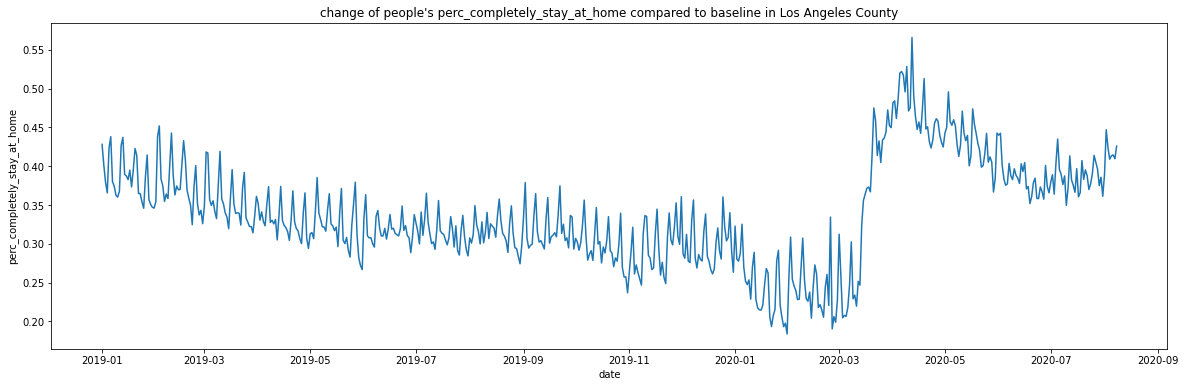

In [78]:
plotTimeSeries_2('perc_completely_stay_at_home', 6037)

As we can see, the percentage of staying at home devices changes almost exactly like how it changed in the google mobility dataset. the numbers both increased about 30% in both google and safegraph dataset.

# 3. Conclusion

Just based on the change of time people stay in residential areas, we are able to verify that the data from SafeGraph and from Google mobility dataset aligh pretty well, on King county and on LA county.